In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/emotion-detection-from-text/tweet_emotions.csv


In [3]:
import matplotlib.pyplot as plt
import nltk
import re # regex
import nltk # text processing libraries
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer # lemmatizier
from nltk.corpus import stopwords # NLTK stopword
from gensim.parsing.preprocessing import STOPWORDS 

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [4]:
train_df=pd.read_csv('/kaggle/input/emotion-detection-from-text/tweet_emotions.csv')
train_df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   content    40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB


In [6]:
train_df['sentiment'].unique()

array(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger'],
      dtype=object)

<Axes: xlabel='count', ylabel='sentiment'>

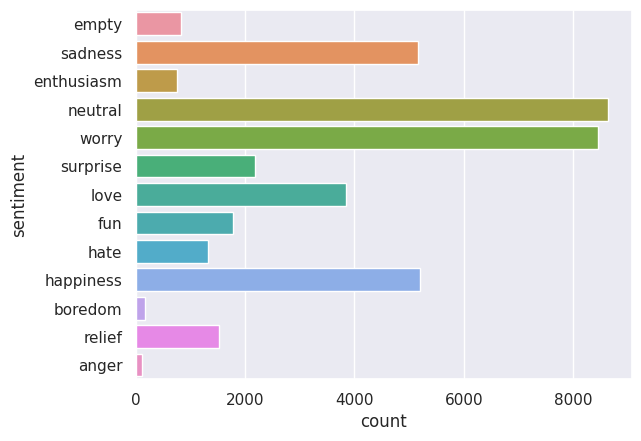

In [7]:
import seaborn as sns
sns.set()
sns.countplot(train_df, y='sentiment')

### Data cleaning

In [8]:
def clean_text(text):
    text=str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
    

In [9]:
train_df['content']=train_df['content'].apply(clean_text)
train_df['content'].head()

0    @tiffanylue i know  i was listenin to bad habi...
1    layin n bed with a headache  ughhhh...waitin o...
2                  funeral ceremony...gloomy friday...
3                 wants to hang out with friends soon!
4    @dannycastillo we want to trade with someone w...
Name: content, dtype: object

### Stopwords, Stemming

In [10]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [11]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
#stop_words
stop_words=stopwords.words('english')
def remove_words(text):
    text=' '.join(w for w in str(text).split(' ') if w not in stop_words)
    return text

#Stemming
stemmer = nltk.SnowballStemmer("english")
def stemme_text(text):
    text=' '.join(stemmer.stem(w) for w in text.split(' '))
    return text
#Lemmatization
lemmatizer=WordNetLemmatizer()
def lemmatization_text(text):
    text=' '.join(lemmatizer.lemmatize(w) for w in text.split(' '))
    return text 
#Punctuation
import string
punct_list=list(string.punctuation)
def punct(text):
    for l in punct_list:
        if l in text:
            text=text.replace(l,'')
    return text.strip()
def proprecessing(text):
    text=remove_words(text)
    text=stemme_text(text)
    text=punct(text)
    return text   

In [13]:
train_df['content']=train_df['content'].apply(proprecessing)   
Xtrain=train_df['content'].values
ytrain=train_df['sentiment'].values

### Tokenization, padding

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [15]:
token=Tokenizer()
token.fit_on_texts(list(Xtrain))

In [16]:
word_idx=token.word_index
vocab_size=len(word_idx)
vocab_size

45204

In [17]:
Xtoken=token.texts_to_sequences(Xtrain)

In [18]:
Xtoken[:5]

[[12925, 15, 2787, 58, 4003, 683, 84, 994, 368],
 [8192, 220, 83, 389, 12926, 97],
 [2347, 12927, 142],
 [16, 350, 69, 98],
 [12928, 16, 2017, 172, 2116, 1491, 13, 935]]

In [19]:
max_length=max(len(w) for w in Xtoken)
max_length

26

In [20]:
Xpad=pad_sequences(Xtoken, padding='post')

In [21]:
print(f'Size of Xpad: {Xpad.shape}')
print(Xpad[:5,:])

Size of Xpad: (40000, 26)
[[12925    15  2787    58  4003   683    84   994   368     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [ 8192   220    83   389 12926    97     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [ 2347 12927   142     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [   16   350    69    98     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [12928    16  2017   172  2116  1491    13   935     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0]]


### Label encoder the target

In [22]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical 

In [23]:
le=LabelEncoder()
ylabel=le.fit_transform(ytrain)
ylabel

array([ 2, 10, 10, ...,  7,  5,  7])

In [24]:
ycat=to_categorical(ylabel) #Transform ylabel in the categorical form
ycat.shape

(40000, 13)

In [25]:
from sklearn.model_selection import train_test_split
X, Xval, y, yval=train_test_split(Xpad, ycat, test_size=0.2)
print(X.shape)
print(Xval.shape)

(32000, 26)
(8000, 26)


### Model

In [25]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional

In [26]:
model = Sequential()
model.add(Embedding(vocab_size+1, 100, input_length=Xpad.shape[1]))
model.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))
model.add(Bidirectional(LSTM(64, dropout=0.2,recurrent_dropout=0.2)))
model.add(Dense(13, activation='softmax'))

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(
    Adam(),
    loss='crossentropy',
    metrics=['accuracy'],
    )

In [28]:
history=model.fit(
    Xpad,
    ycat,
    validation_data=(Xval, yval),
    epochs=20,
    batch_size=32
)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 107s 78ms/step - accuracy: 0.2819 - loss: 2.0608 - val_accuracy: 0.4246 - val_loss: 1.7544
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 96s 77ms/step - accuracy: 0.4382 - loss: 1.6930 - val_accuracy: 0.6106 - val_loss: 1.2613
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 97s 77ms/step - accuracy: 0.6166 - loss: 1.2101 - val_accuracy: 0.7617 - val_loss: 0.7838
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 96s 77ms/step - accuracy: 0.7470 - loss: 0.8247 - val_accuracy: 0.8344 - val_loss: 0.5454
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 95s 76ms/step - accuracy: 0.8107 - loss: 0.5988 - val_accuracy: 0.8725 - val_loss: 0.4119
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 108s 86ms/step - accuracy: 0.8475 - loss: 0.4728 - val_accuracy: 0.8929 - val_loss: 0.3407
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 131s 77ms/step - accuracy: 0.8730 - loss: 0.3958 - val_accuracy: 0.8997 - val_loss: 0.3066
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 96s 77ms/step - accuracy: 0.886

In [29]:
history_df=pd.DataFrame(history.history)
history_df

,accuracy,loss,val_accuracy,val_loss
0,0.314450,1.985376,0.424625,1.754420
1,0.442000,1.681556,0.610625,1.261346
2,0.613525,1.218576,0.761750,0.783818
3,0.737550,0.846472,0.834375,0.545374
4,0.803000,0.625649,0.872500,0.411858
5,0.838725,0.496393,0.892875,0.340733
6,0.863275,0.419797,0.899750,0.306551
7,0.876425,0.373198,0.913750,0.264481
8,0.888375,0.334822,0.922125,0.249156
9,0.898475,0.303000,0.933750,0.216393


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

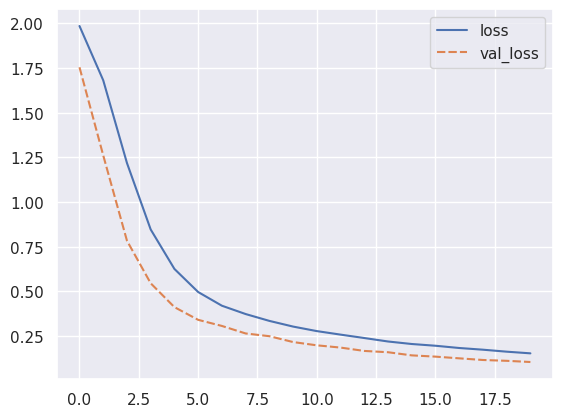

In [30]:
sns.lineplot(history_df[['loss', 'val_loss']])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

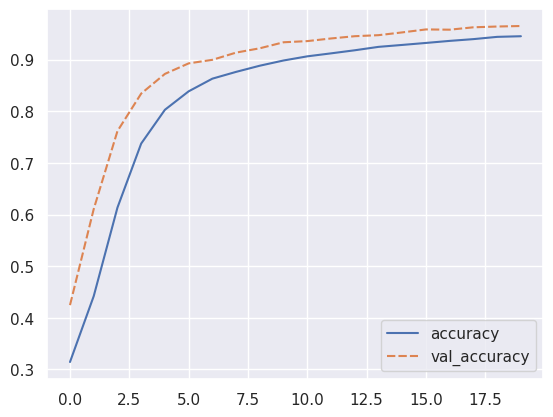

In [31]:
sns.lineplot(history_df[['accuracy','val_accuracy']])

In [32]:
y_pred=np.argmax(model(Xpad), axis=1)

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score 

In [34]:
confusion_matrix(ylabel, y_pred)

array([[ 105,    0,    0,    0,    0,    0,    3,    0,    0,    0,    0,
           0,    2],
       [   0,  161,    2,    1,    0,    1,    4,    0,    2,    1,    3,
           1,    3],
       [   0,    0,  746,    2,    0,    3,    0,    5,   57,    1,    8,
           1,    4],
       [   0,    0,    0,  710,    0,    6,    0,    3,   34,    0,    0,
           2,    4],
       [   0,    1,    0,    5, 1715,   24,    1,    5,   15,    1,    3,
           3,    3],
       [   0,    0,    1,    4,    6, 5041,    1,   58,   62,    7,    4,
           6,   19],
       [   0,    0,    0,    0,    0,    0, 1292,    0,   11,    0,   11,
           0,    9],
       [   0,    1,    1,    1,    2,   35,    0, 3728,   44,    3,    7,
           4,   16],
       [   0,    0,    5,    1,    2,   39,    5,   49, 8470,    6,   14,
           7,   40],
       [   0,    0,    1,    0,    0,   10,    1,   15,   38, 1449,    2,
           1,    9],
       [   0,    0,    3,    2,    1,   14,   10, 

### Pytorch

In [26]:
import torch
from torch.utils.data import TensorDataset, DataLoader, Dataset

In [27]:
len(ycat)

40000

In [28]:
class CusDataset(Dataset):
    def __init__(self, X, y):
        self.X=X
        self.y=y
    def __getitem__(self,idx):
        return self.X[idx], self.y[idx]
    def __len__(self):
        return len(self.y)   

In [29]:
X_tensor=torch.from_numpy(Xpad)
y_tensor=torch.from_numpy(ycat).type(torch.LongTensor)

In [30]:
X_ts, Xval_ts, y_ts, yval_ts=train_test_split(X_tensor, y_tensor, test_size=0.2)

In [31]:
X_ts.shape

torch.Size([32000, 26])

In [45]:
Xval.shape

(8000, 26)

In [32]:
train_data=CusDataset(X_ts, y_ts)
val_data=CusDataset(Xval_ts, yval_ts)

In [38]:
train_loader=DataLoader(train_data, batch_size=32)
val_loader=DataLoader(val_data, batch_size=32)

In [39]:
for i, (X,y) in enumerate(train_loader):
    print(i)
    print(X.shape)
    print(y.shape)
    if i==1:
        break

0
torch.Size([32, 26])
torch.Size([32, 13])
1
torch.Size([32, 26])
torch.Size([32, 13])


### Model

In [33]:
import torch.nn as nn
import torch.functional as F

In [59]:
class NLPClf(nn.Module):
    def __init__(self, vocab_size, emb_dim, output_size):
        super(NLPClf, self).__init__()
        self.vocab_size=vocab_size
        self.emb_dim=emb_dim
        self.output_size=output_size
        #layers
        self.embedding=nn.Embedding(self.vocab_size, self.emb_dim)
        self.lstm1=nn.LSTM(self.emb_dim, 64, bidirectional=True, batch_first=True)
        self.lstm2=nn.LSTM(128, 32, bidirectional=True, batch_first=True)
        self.flatten=nn.Flatten()
        self.fc=nn.Linear(26*64, self.output_size)
        self.softmax=nn.Softmax()
        self.dropout=nn.Dropout(p=0.2)
    #Forward
    def forward(self, x):
        #h0=torch.zeros(2, x.size(0), 32)
        #c0=torch.zeros(2, x.size(0), 32)
        x=self.embedding(x)
        x,_=self.lstm1(x)
        x=self.dropout(x)
        #h1=torch.zeros(2, x.size(0), 16)
        #c1=torch.zeros(2, x.size(0), 16)
        x,_=self.lstm2(x)
        x=self.dropout(x)
        x=self.flatten(x)
        x=self.fc(x)
        x=self.softmax(x)
        return x

In [60]:
emb=100
output_size=13
model=NLPClf(vocab_size+1, emb, output_size)
criterion=nn.CrossEntropyLoss()
opt=torch.optim.Adam(model.parameters())

In [61]:
n_epochs=31
Loss_train=[]
Acc_train=[]
Acc_val=[]
for epoch in range(n_epochs):
    Loss=0
    train_acc=0
    total=0
    correct=0
    for i, (X,y) in enumerate(train_loader):
        #print(X.shape)
        y=y.type(torch.FloatTensor)
        opt.zero_grad()
        y_pred=model(X)
        loss=criterion(y_pred,y)
        loss.backward()
        opt.step()
        Loss+=loss.item()
        pred=torch.max(y_pred.data,1)[1]
        target=torch.max(y.data,1)[1]
        correct+=(pred==target).sum().item()
        total+=y.size()[0]
    Acc_train.append(correct/total)    
    Loss_train.append(Loss/1000)
    if epoch%10==0:
        print(f'Epoch {epoch}, loss {Loss/1000}, acc {correct/total} ')

Epoch 0, loss 2.4263196156024933, acc 0.2555625 
Epoch 10, loss 2.174543146252632, acc 0.5138125 
Epoch 20, loss 2.10580670940876, acc 0.5825 
Epoch 30, loss 2.055661178469658, acc 0.63321875 


In [64]:
model.eval()
with torch.no_grad():
    for epoch in range(n_epochs):
    [[Loss=0
    train_acc=0
    total=0
    correct=0
    for i, (X,y) in enumerate(val_loader):
        #print(X.shape)
        y=y.type(torch.FloatTensor)
        y_pred=model(X)
        loss=criterion(y_pred,y)
        Loss+=loss.item()
        pred=torch.max(y_pred.data,1)[1]
        target=torch.max(y.data,1)[1]
        correct+=(pred==target).sum().item()
        total+=y.size()[0]
    Acc_train.append(correct/total)    
    Loss_train.append(Loss/1000)
    if epoch%5==0:
        print(f'Epoch {epoch}, loss {Loss/1000}, acc {correct/total} ')]]

IndentationError: expected an indented block after 'with' statement on line 2 (2142219395.py, line 3)

In [62]:
model.eval()
with torch.no_grad():
    y_pred_val=model(Xval_ts)
    pred_val=torch.max(y_pred_val.data,1)[1]
    target_val=torch.max(yval_ts.data,1)[1]
    correct_val=(pred_val==target_val).sum().item()
    print(f'Acc of validation {correct_val/8000}')

Acc of validation 0.283625


In [47]:
y_pred_val.shape

torch.Size([8000, 13])

In [57]:
sum(torch.max(y_pred_val,1)[1]==torch.max(yval_ts,1)[1])

tensor(2414)

In [56]:
torch.max(yval_ts,1)[1]

tensor([ 9,  5, 12,  ..., 10, 12, 10])

In [ ]:
import seaborn as sns
sns.set()
plt.plot(Loss_train)

In [ ]:
Acc_val

In [ ]:
plt.plot(Acc_train)